In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as pl
import xarray as xr
from scipy.integrate import odeint
import regionmask
import matplotlib.pylab as plt
import cartopy.crs as ccrs
import scipy.stats
from scipy.stats import norm
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import summary_table 
import time
import warnings
import seaborn as sns
from sklearn.metrics import r2_score#print(r2_score(y3,y3_fitted))

import xlrd
import random
####     ax.set_extent([-15, 45, 28, 76], crs=ccrs.PlateCarree())
from sklearn import preprocessing
robust = preprocessing.RobustScaler()
warnings.filterwarnings('ignore')
from matplotlib import cm
from matplotlib.colors import ListedColormap
from cartopy.util import add_cyclic_point

In [2]:
def gini(wealths):
    cum_wealths = np.cumsum(sorted(np.append(wealths, 0)))
    sum_wealths = cum_wealths[-1]
    xarray = np.array(range(0, len(cum_wealths))) / np.float(len(cum_wealths) - 1)
    upper = xarray
    yarray = cum_wealths / sum_wealths
#     pl.plot(xarray, yarray)
#     pl.plot(xarray, upper)
    B = np.trapz(yarray, x=xarray)
    A = 0.5 - B
    G = A / (A + B)
    return(G)
#     print (G)

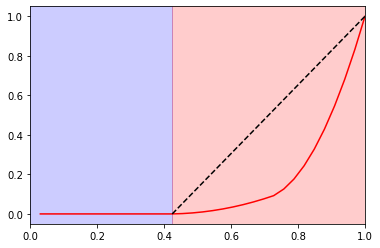

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# 函数：计算洛伦兹曲线
def calculate_lorenz_curve(data):
    data_sorted = np.sort(data)
    cumulative_percentage = np.arange(1, len(data) + 1) / len(data)
    lorenz_curve_y = np.cumsum(data_sorted) / np.sum(data_sorted)
    return cumulative_percentage, lorenz_curve_y

data1 = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100])

cumulative_percentage, lorenz_curve_y1 = calculate_lorenz_curve(data1)

plt.plot(cumulative_percentage, lorenz_curve_y1, 'r-', label='高度不平等（指数分布）')

plt.plot([0.42424242, 1], [0, 1], 'k--', label='完全平等线')

plt.axvspan(0, 0.42424242, color='blue', alpha=0.2)  # alpha控制透明度
plt.axvspan(0.42424242, 1, color='red', alpha=0.2)
plt.xlim(0,1)
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('si2.svg')

In [4]:
gini([0,0,0,0,10,20,30,100])

0.71875

In [5]:
gini([0,0,0,0,0,20,30,100])

0.7583333333333333

In [6]:
gini([0,0,0,0,100,20,30,100])

0.655

In [9]:
gini([1,1,1,1,10,20,30,100])

0.6890243902439024

In [10]:
gini([1,1,1,1,100,20,30,100])

0.6368110236220472

In [11]:
gini([0,0,0,0,10,20,30,100])-gini([0,0,0,0,100,20,30,100])

0.06374999999999997

In [12]:
gini([1,1,1,1,10,20,30,100])-gini([1,1,1,1,100,20,30,100])

0.05221336662185516